# Conociendo el contenido

### Notas:
> - Este playbook require haber ejecutado "conversion-de-tipos"
> - El estudio se realizará sólo sobre viviendas de cualquier tipo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [127]:
df = pd.read_pickle("data/propiedades.pkl")
df.dtypes

id                               int64
titulo                          object
descripcion                     object
tipodepropiedad               category
direccion                       object
ciudad                        category
provincia                     category
antiguedad                     float64
habitaciones                     int32
garages                          int32
banos                            int32
metroscubiertos                float64
metrostotales                  float64
idzona                          object
lat                            float64
lng                            float64
fecha                           object
gimnasio                          bool
usosmultiples                     bool
piscina                           bool
escuelascercanas                  bool
centroscomercialescercanos        bool
precio                         float64
dtype: object

In [128]:
df.shape

(240000, 23)

In [129]:
df=df.filter(items=[
    'id','tipodepropiedad','ciudad','provincia','habitaciones',
    'garages','banos','metroscubiertos','idzona','gimnasio',
    'usuamultiples','piscina','escuelascercanas',
    'centroscomercialescercanos','precio','antiguedad'
])

In [130]:
df.shape

(240000, 15)

In [131]:
df.tipodepropiedad.unique().tolist()

['Apartamento',
 'Casa en condominio',
 'Casa',
 'Terreno',
 'Terreno comercial',
 'Local Comercial',
 'Quinta Vacacional',
 'Oficina comercial',
 'Edificio',
 'Casa uso de suelo',
 'Local en centro comercial',
 'Bodega comercial',
 'Otros',
 'Villa',
 'Duplex',
 'Inmuebles productivos urbanos',
 'Departamento Compartido',
 'Nave industrial',
 'Rancho',
 'Terreno industrial',
 nan,
 'Huerta',
 'Lote',
 'Hospedaje',
 'Garage']

In [146]:
viviendas = [
    'Casa','Apartamento','Casa en condominio','Casa uso de suelo', 'Duplex'
]

In [133]:
# Ignora los warnings producto de dividir por NaN

with np.errstate(divide='ignore',invalid='ignore'):
    # identifica el precio por unidad de m2 cubierto. Los redonde a entero
    df.loc[:,'precio_metroscubiertos'] = (
        round(df.loc[:,'precio'] / df.loc[:,'metroscubiertos'],0)
    )

    # Expresa los precios en miles y las estadísticas a 2 decimales para hacer la lectura más simple 
    df.loc[:,'precio_miles_metroscubiertos'] = round(
        df.loc[:,'precio_metroscubiertos'],
        -3
    )

    # Crea una columna que expresa los metros cubiertos en decenas para consolidar en grupos de 10 en 10
    df.loc[:,'decenasmetroscubiertos']=round(df.loc[:,'metroscubiertos'],-1)

In [147]:
# Toma sólo las viviendas para el estudio

viviendasdf = df[df['tipodepropiedad'].isin(viviendas)].copy()

# Redefine la categoria de tipo de propiedad en base a los valores filtrados
viviendasdf['tipodepropiedad'] = viviendasdf['tipodepropiedad'].astype('str').astype('category')
viviendasdf.shape

(219406, 18)

In [148]:
viviendasdf['tipodepropiedad'].dtype

CategoricalDtype(categories=['Apartamento', 'Casa', 'Casa en condominio',
                  'Casa uso de suelo', 'Duplex'],
                 ordered=False)

In [149]:
viviendasdf.head(3)

,id,tipodepropiedad,ciudad,provincia,habitaciones,garages,banos,metroscubiertos,idzona,gimnasio,piscina,escuelascercanas,centroscomercialescercanos,precio,antiguedad,precio_metroscubiertos,precio_miles_metroscubiertos,decenasmetroscubiertos
0,254099,Apartamento,Benito Juárez,Distrito Federal,2,1,2,80.0,23533,False,False,False,False,2273000.0,NaN,28412.0,28000.0,80.0
1,53461,Casa en condominio,La Magdalena Contreras,Distrito Federal,3,2,2,268.0,24514,False,False,True,True,3600000.0,10.0,13433.0,13000.0,270.0
2,247984,Casa,Tonalá,Jalisco,3,2,2,144.0,48551,False,False,False,False,1200000.0,5.0,8333.0,8000.0,140.0


In [150]:
viviendasdf.groupby(['tipodepropiedad']).describe()\
  .stack().unstack(0).stack().loc[
    :,
    ['habitaciones','banos','garages','metroscubiertos','decenasmetroscubiertos',
     'precio_metroscubiertos','precio_miles_metroscubiertos']
]

habitaciones          banos        garages  \
      tipodepropiedad                                                   
count Apartamento          57341.000000   57341.000000   57341.000000   
      Casa                141717.000000  141717.000000  141717.000000   
      Casa en condominio   19297.000000   19297.000000   19297.000000   
      Casa uso de suelo      708.000000     708.000000     708.000000   
      Duplex                 343.000000     343.000000     343.000000   
mean  Apartamento              2.345163       1.774455       1.318359   
      Casa                     3.019250       2.104328       1.417494   
      Casa en condominio       2.924185       2.267606       1.588071   
      Casa uso de suelo        3.038136       1.871469       0.943503   
      Duplex                   2.518950       1.341108       1.157434   
std   Apartamento              0.698727       0.807015       0.803934   
      Casa                     0.988986       1.050963       0.963826   
      Casa en condominio       0.682875       0.995952       0.948688   
      Casa uso de suelo        2.611034       1.303517       1.119292   
      Duplex                   0.939122       0.690560       0.638663   
min   Apartamento              0.000000       0.000000       0.000000   
      Casa                     0.000000       0.000000       0.000000   
      Casa en condominio       0.000000       0.000000       0.000000   
      Casa uso de suelo        0.000000       0.000000       0.000000   
      Duplex                   0.000000       0.000000       0.000000   
25%   Apartamento              2.000000       1.000000       1.000000   
      Casa                     3.000000       1.000000       1.000000   
      Casa en condominio       3.000000       2.000000       1.000000   
      Casa uso de suelo        0.000000       1.000000       0.000000   
      Duplex                   2.000000       1.000000       1.000000   
50%   Apartamento              2.000000       2.000000       1.000000   
      Casa                     3.000000       2.000000       2.000000   
      Casa en condominio       3.000000       2.000000       2.000000   
      Casa uso de suelo        3.000000       2.000000       0.000000   
      Duplex                   2.000000       1.000000       1.000000   
75%   Apartamento              3.000000       2.000000       2.000000   
      Casa                     3.000000       3.000000       2.000000   
      Casa en condominio       3.000000       3.000000       2.000000   
      Casa uso de suelo        4.000000       3.000000       2.000000   
      Duplex                   3.000000       2.000000       1.000000   
max   Apartamento             10.000000       4.000000       3.000000   
      Casa                    10.000000       4.000000       3.000000   
      Casa en condominio      10.000000       4.000000       3.000000   
      Casa uso de suelo       10.000000       4.000000       3.000000   
      Duplex                   8.000000       4.000000       3.000000   

                          metroscubiertos  decenasmetroscubiertos  \
      tipodepropiedad                                               
count Apartamento            56518.000000            56518.000000   
      Casa                  135185.000000           135185.000000   
      Casa en condominio     18704.000000            18704.000000   
      Casa uso de suelo        609.000000              609.000000   
      Duplex                   338.000000              338.000000   
mean  Apartamento              117.048657              116.973354   
      Casa                     194.026911              194.002885   
      Casa en condominio       187.697231              187.682849   
      Casa uso de suelo        254.068966              254.039409   
      Duplex                   100.215976              100.177515   
std   Apartamento               67.299715               67.430405   
      Casa                      98.515058               98.5573

## Conclusiones parciales
* Las casa de uso de suelo tienen características muy distintas al resto de las viviendas unifamiliares en cuanto a número de habitaciones y baños, no así en cuanto a garages
* El 25% de las casas de uso de suelo no cuentan con garages

* En promedio, los apartamentos tienen menos habitaciones que las casas pero tienen un precio superior.

* Existe un gupo de viviendas que corresponde a la cota superior al 75% que dista por mucho del 75% en cuanto a habitaciones, baños y garages. 


## Identificación de correlaciones entre las variables y el precio

Existen distintas variables que describen a una vivienda, tales como habitaciones, baños, garages, centros comerciales y escuelas cernanas entre otras. a continuación se inteta identificar la correlación entre estas variables.


In [151]:
viviendasConPrecios = viviendasdf.loc[:,'precio']>=0

In [152]:
dataNacional=viviendasdf.loc[viviendasConPrecios,:]\
    .groupby(['tipodepropiedad','decenasmetroscubiertos','precio_miles_metroscubiertos'])\
    ['precio_miles_metroscubiertos']\
    .count().rename('cantidad').reset_index()
data.head(2)

,id,tipodepropiedad,ciudad,provincia,habitaciones,garages,banos,metroscubiertos,idzona,gimnasio,piscina,escuelascercanas,centroscomercialescercanos,precio,antiguedad,precio_metroscubiertos,precio_miles_metroscubiertos,decenasmetroscubiertos,cantidad_publicados_en_cuidad
0,254099,Apartamento,Benito Juárez,Distrito Federal,2,1,2,80.0,23533,False,False,False,False,2273000.0,NaN,28412.0,28000.0,80.0,10403
13,130216,Casa,Benito Juárez,Distrito Federal,0,0,0,227.0,50003995,False,False,False,False,3000000.0,20.0,13216.0,13000.0,230.0,10403


In [177]:
# funciones de plot para las categorias

def doPlot(df, tipodepropiedad):
    plt.close('all')
    plt.scatter('decenasmetroscubiertos','precio_miles_metroscubiertos',c='cantidad',
                data=df.loc[df['tipodepropiedad']==tipodepropiedad], cmap='viridis')
    plt.title('Incidencia del # de metros cubiertos sobre el precio en %s' %tipodepropiedad)
    plt.ylabel('Precio (MX$) m2')
    plt.xlabel('# de metroscubiertos2 en la unidad habitacional')
    plt.grid(True)
    plt.colorbar()
    plt.show()

    plt.scatter('decenasmetroscubiertos','precio_miles_metroscubiertos',c='cantidad',
                data=df.loc[df['tipodepropiedad']==tipodepropiedad], cmap='viridis')
    plt.ylabel('Precio (MX$) m2 (Log10)')
    plt.xlabel('# de metroscubiertos2 en la unidad habitacional')
    plt.grid(True)
    plt.colorbar()
    plt.yscale('log')
    plt.show()

def doPlotCategorias(df):
    for tipo in viviendas:
        doPlot(df,tipo)


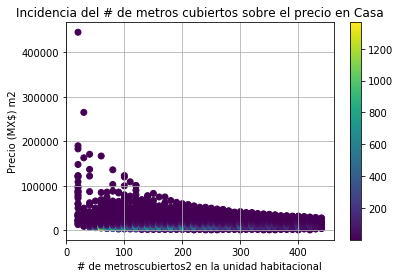

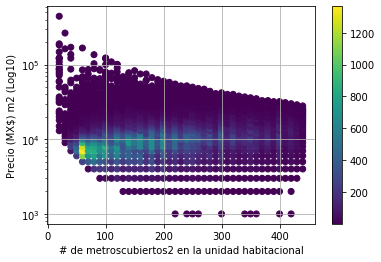

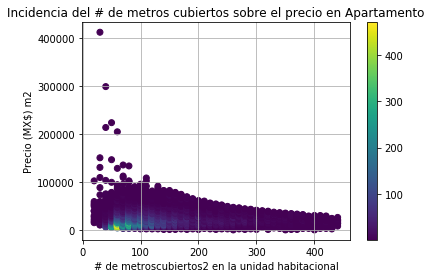

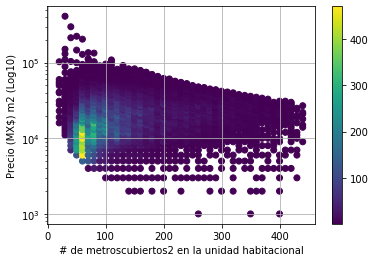

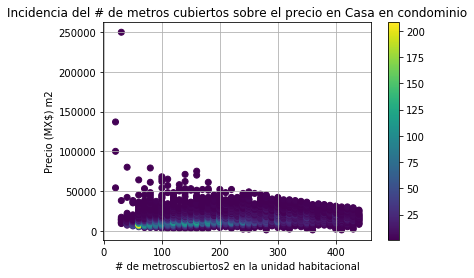

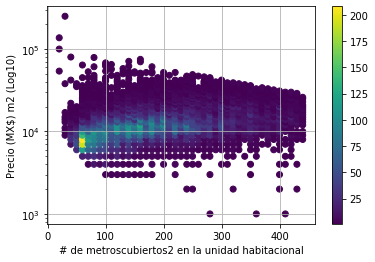

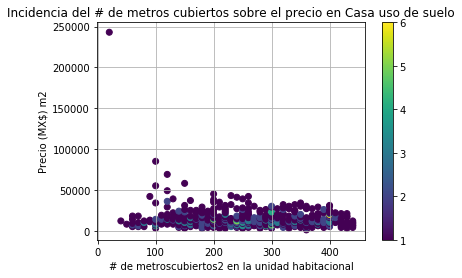

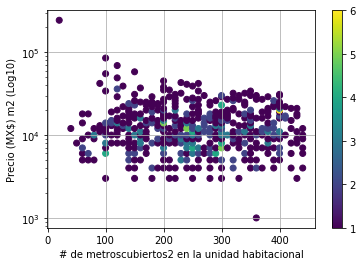

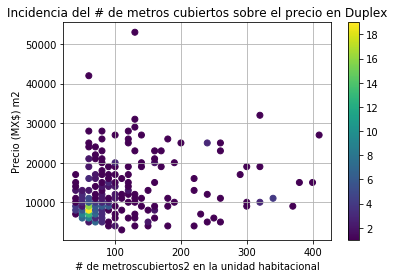

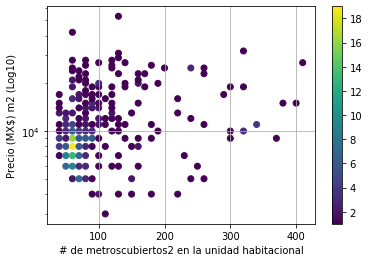

In [179]:
# Grafica las categorías 

doPlotCategorias(dataNacional)


## Observación
Del gráfico se deduce que hay un amplio rango de precios, inclusive precios superiores a un menor número de metros, esto se puede deber a las distintas localidades y a losdistintos niveles de categorías de zona/construcción.
Para obtener una mejor visualización del comportamiento del precio acotaré el estudio a la cuidad con mayor número de publicaciones.

In [180]:
ciudadesMasPublicadasdf = viviendasdf\
    .groupby(['provincia','ciudad'])['id']\
    .count().rename('cantidad').reset_index()\
    .sort_values(by='cantidad', ascending=False).head(2)\
    .set_index(['provincia','ciudad'])
ciudadesMasPublicadasdf

,,cantidad
provincia,ciudad,
Querétaro,Querétaro,11258
Distrito Federal,Benito Juárez,10403


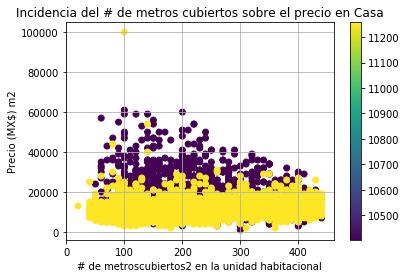

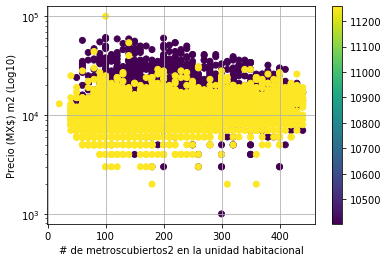

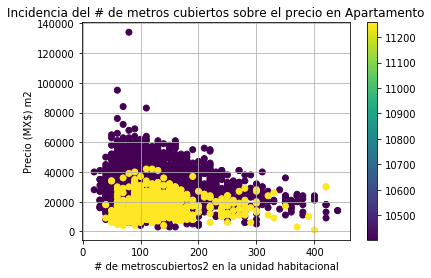

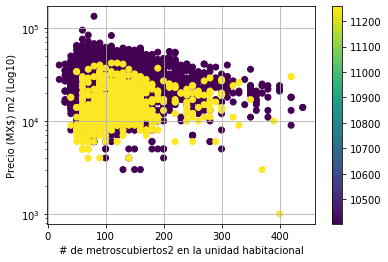

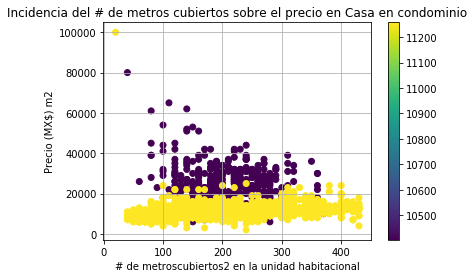

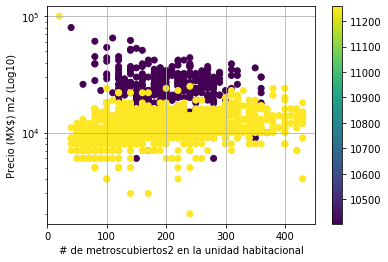

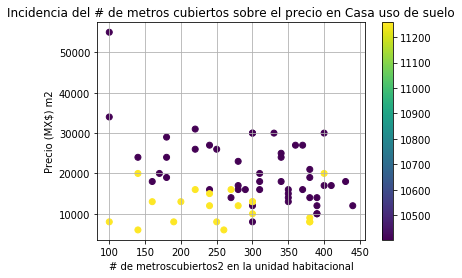

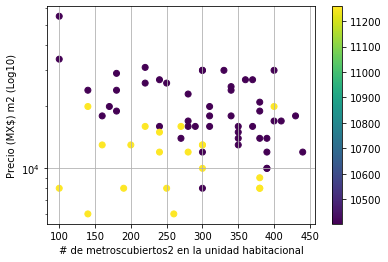

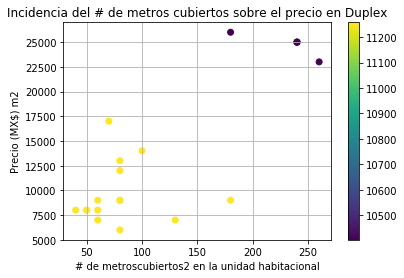

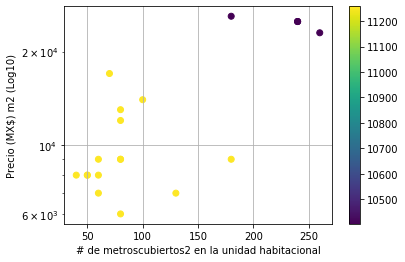

In [181]:
doPlotCategorias(
    viviendasdf.join(ciudadesMasPublicadasdf, on=['provincia','ciudad'], how='inner')
)


## Conclusiones del análisis de las 3 ciudades con más publicaciones

De acuerdo a las gráficas, no se observa una relación del precio del metro cuadado que se pueda relacionar directamente con el tamaño de la propiedad

In [162]:
## Revisión de la relación entre el precio del m2 de la vivienda y el número de garages

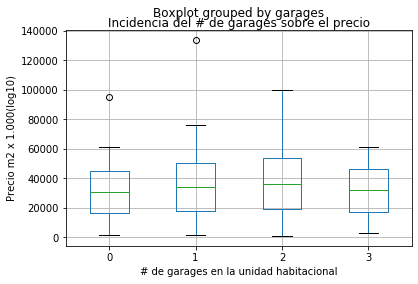

In [203]:
# relacion extistencas de garages vs precio m2
data= viviendasdf.join(ciudadesMasPublicadasdf, on=['provincia','ciudad'], how='inner')\
    .groupby(['garages','precio_miles_metroscubiertos'])\
    ['precio_miles_metroscubiertos']\
    .count().rename('cantidad').reset_index()

#plt.scatter('garages','precio_miles_metroscubiertos',c='cantidad',data=data, cmap='viridis')

data.boxplot(column=['precio_miles_metroscubiertos'], by=['garages'])
plt.title('Incidencia del # de garages sobre el precio', pad=3)
plt.ylabel('Precio m2 x 1.000(log10)')
plt.xlabel('# de garages en la unidad habitacional')
plt.grid(True)
#plt.colorbar()

None


### Conclusiones sobre la incidencia del # de garages sobre el precio del m2
El precio medio del metro cuadrado entre las viviendas que tienen de 0 a 3 garages es similar.No se puede concluir que exista una incidendia directa de esta variable